**Setup** <br>
Uncomment and run the lines below if you have not installed these packages yet:

In [52]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install -U pandas-profiling

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from pandas_profiling import ProfileReport

# Exercise 3: Data exploration

In [54]:
# Download: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

# Load DataFrame
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [55]:
# # Create report
# profile = ProfileReport(diabetes, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

<br>
<br>

# Exercise 4: Visualization

**Diverging colormaps**: RdBu, BrBG, PuOr, coolwarm, ...

In [56]:
# Compute correlation matrix (Pearson correlation)
correlation_matrix = diabetes.corr()
# correlation_matrix

<AxesSubplot:>

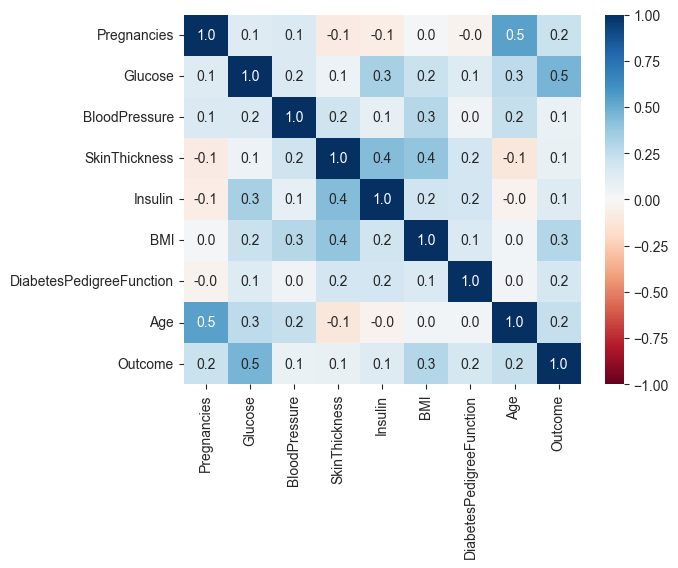

In [57]:
# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='RdBu', vmin=-1, vmax=1)

In [58]:
# load DataFrame
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


**Visualize #passengers per month and year**

In [59]:
# "Pivot" the DataFrame such that we get #passengers for each month & year
flights_2D = flights.pivot(index='month', columns='year', values='passengers')
#flights_2D

<AxesSubplot:xlabel='year', ylabel='month'>

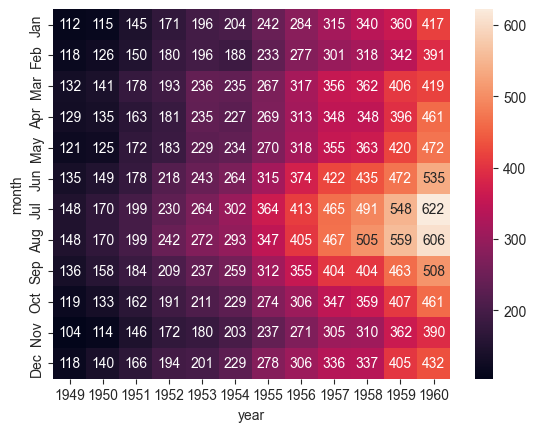

In [60]:
# Plot a heatmap
sns.heatmap(flights_2D, annot=True, fmt='d')

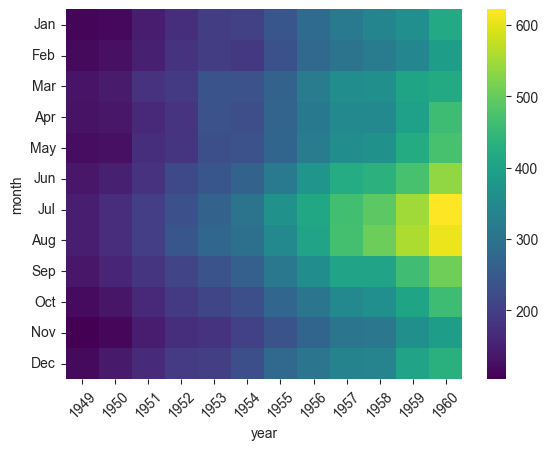

In [61]:
# Plot heatmap with a suitable colormap
sns.heatmap(flights_2D, cmap='viridis')

# Rotate labels
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

**More colormaps:**
* _Sequential colormaps:_ Blues, Greens, Greys, ...
* _Perceptually uniform sequential colormaps:_ viridis, cividis, magma, plasma, inferno

Further information: https://matplotlib.org/stable/tutorials/colors/colormaps.html

<br>

## 1) Lineplot

**Trend of #passengers over the years?**

In [62]:
months = flights['month'].unique()
months

['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']

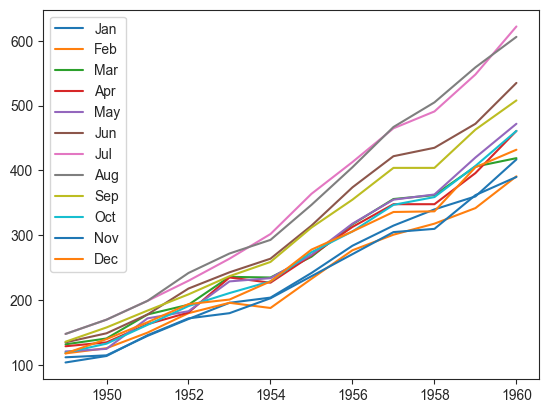

In [63]:
for month in months:
    flights_current_month = flights[flights['month'] == month]
    plt.plot(flights_current_month['year'], flights_current_month['passengers'], label=month)
plt.legend()

**Trend of average #passengers over the years?**

In [64]:
# Compute mean passengers per year
mean_passengers = flights.groupby('year')['passengers'].mean()
mean_passengers

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: passengers, dtype: float64

In [65]:
# Compute standard deviation of passengers per year
std_passengers = flights.groupby('year')['passengers'].std()
std_passengers

year
1949    13.720147
1950    19.070841
1951    18.438267
1952    22.966379
1953    28.466887
1954    34.924486
1955    42.140458
1956    47.861780
1957    57.890898
1958    64.530472
1959    69.830097
1960    77.737125
Name: passengers, dtype: float64

<ErrorbarContainer object of 3 artists>

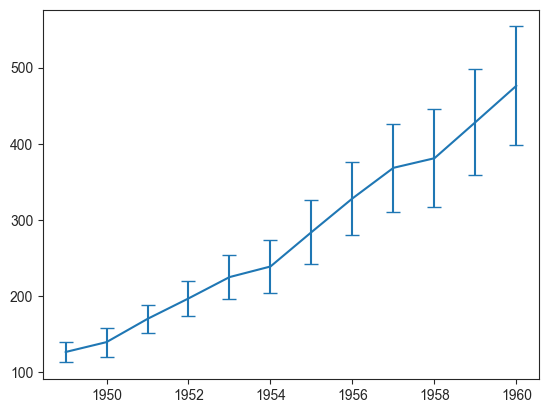

In [66]:
# Line plot with errorbars (mean +/- standard deviation)
plt.errorbar(mean_passengers.index, mean_passengers.values, yerr=std_passengers, capsize=5)

Text(0, 0.5, 'passengers')

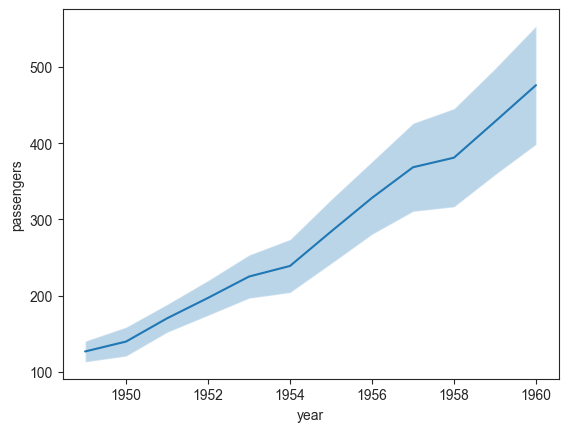

In [67]:
# Line plot with error bands (mean +/- standard deviation)
plt.plot(mean_passengers.index, mean_passengers.values)
plt.fill_between(mean_passengers.index, mean_passengers.values - std_passengers, mean_passengers.values + std_passengers,
                 alpha=0.3)
plt.xlabel('year')
plt.ylabel('passengers')

**Using seaborn:**

<AxesSubplot:xlabel='year', ylabel='passengers'>

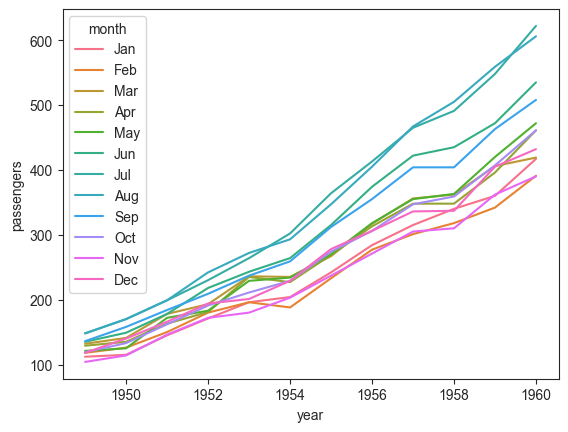

In [68]:
# plot line for each month separately
sns.lineplot(flights, x='year', y='passengers', hue='month')

<AxesSubplot:xlabel='year', ylabel='passengers'>

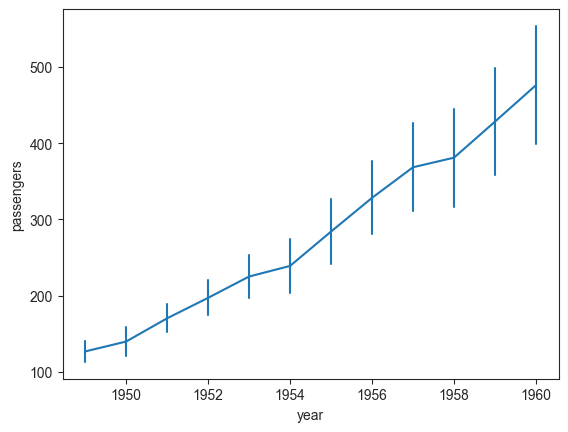

In [69]:
# lineplot with error bars
sns.lineplot(flights, x='year', y='passengers', errorbar='sd', err_style='bars')

<AxesSubplot:xlabel='year', ylabel='passengers'>

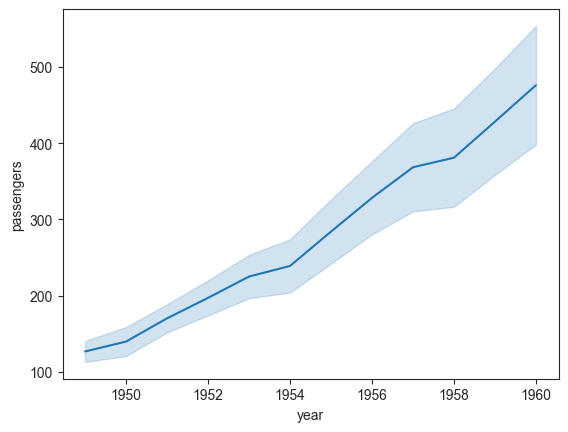

In [70]:
# lineplot with error band
sns.lineplot(flights, x='year', y='passengers', errorbar='sd')

<br>

## 2) Histogram & boxplot (age distribution)

In [71]:
# Download: https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region

# load DataFrame
df = pd.read_csv('IT Salary Survey EU  2020.csv')
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [72]:
# Remove NaN's from column 'Age'
df = df[~df['Age'].isnull()]

<AxesSubplot:xlabel='Age', ylabel='Count'>

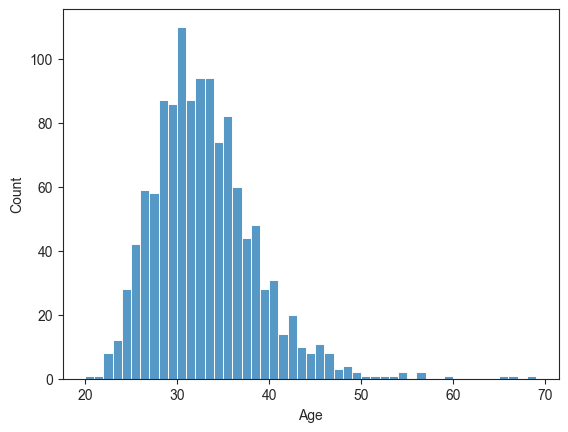

In [73]:
# Create suitable plot for visualizing the age distribution
sns.histplot(df, x='Age', bins=49)

32.50978792822186


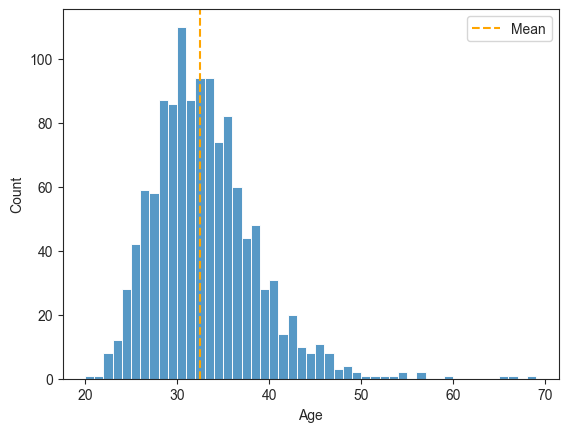

In [74]:
sns.histplot(df, x='Age', bins=49)

# Compute average age
mean_age = df['Age'].mean()
print(mean_age)

# Highlight average age by plotting a vertical line
plt.axvline(x=mean_age, ls='--', color='orange', label='Mean')
plt.legend()

<AxesSubplot:xlabel='Age'>

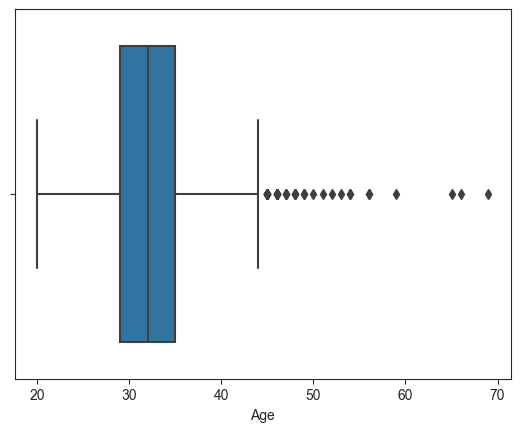

In [75]:
# Boxplot
# df["Age"].plot.box()

# Seaborn boxplot
sns.boxplot(df, x='Age')

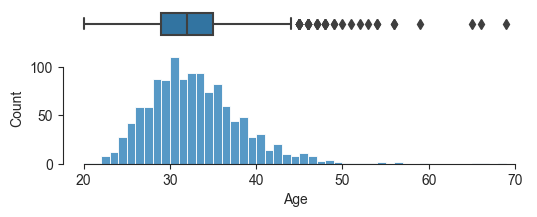

In [76]:
# Plot histogram & boxplot together using plt.subplots()
fig, (ax_boxplot, ax_hist) = plt.subplots(nrows=2,
                                          figsize=(6, 2),
                                          gridspec_kw={"height_ratios": (.2, .8)})

sns.boxplot(df, x='Age', ax=ax_boxplot)
sns.histplot(df, x='Age', bins=49, ax=ax_hist)

# Remove chart borders
sns.despine(ax=ax_boxplot, left=True, bottom=True)
sns.despine(ax=ax_hist, trim=True)

# Remove duplicate axis label and ticks
ax_boxplot.set_xlabel('')
ax_boxplot.set_yticks([])
ax_boxplot.set_xticks([])
plt.show()

In [77]:
# Set seaborn style {darkgrid, whitegrid, dark, white, ticks}
sns.set_style('ticks')

<br>

## 3) Box-, violin-, strip-, and swarmplot (salary distribution)

In [78]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [79]:
# Rename column
df = df.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly brutto salary in EUR'})

<AxesSubplot:ylabel='Yearly brutto salary in EUR'>

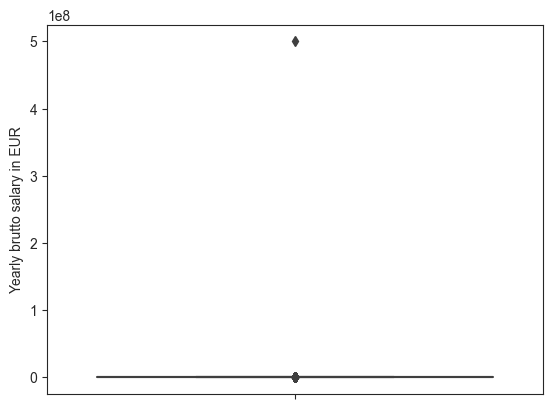

In [80]:
# Boxplot of salary distribution
sns.boxplot(df, y='Yearly brutto salary in EUR')

**Remove outliers (as shown in last week's exercise)**

In [81]:
df['Yearly brutto salary in EUR'].describe()

count    1.226000e+03
mean     4.793870e+05
std      1.427788e+07
min      1.000100e+04
25%      5.820000e+04
50%      7.000000e+04
75%      8.000000e+04
max      5.000000e+08
Name: Yearly brutto salary in EUR, dtype: float64

In [82]:
# Q3 + whis*(Q3 - Q1)
upper_limit = 80000 + 1.5*(80000 - 58800)

# Q1 - whis*(Q3 - Q1)
lower_limit = 58800 - 1.5*(80000 - 58800)

# Apply limits to DataFrame
df = df[(df['Yearly brutto salary in EUR'] <= upper_limit) &
        (df['Yearly brutto salary in EUR'] >= lower_limit)]

<AxesSubplot:ylabel='Yearly brutto salary in EUR'>

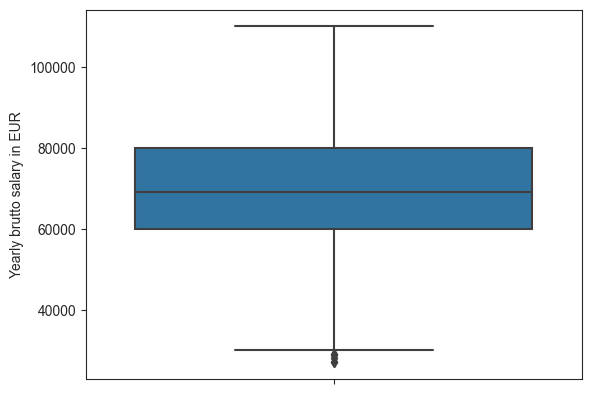

In [83]:
# Seaborn boxplot
sns.boxplot(df, y='Yearly brutto salary in EUR')

**Is there a difference in salary between genders?**

In [84]:
# Remove NaN's from column "Gender"
df = df[~df['Gender'].isnull()]

<AxesSubplot:ylabel='Yearly brutto salary in EUR'>

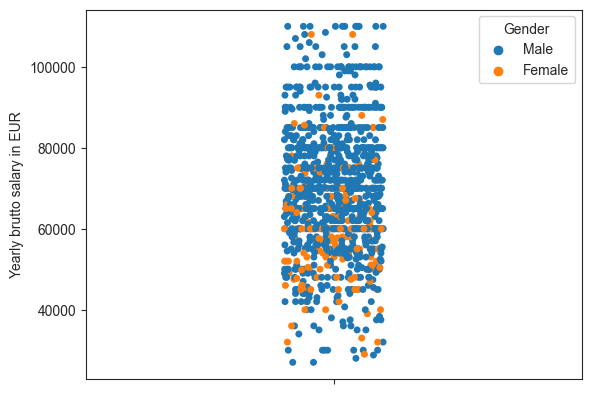

In [102]:
# Plot actual data points with one color for each gender
sns.stripplot(df, y='Yearly brutto salary in EUR', hue='Gender', jitter=True, size=5) # adjust size of points

<AxesSubplot:xlabel='Gender', ylabel='Yearly brutto salary in EUR'>

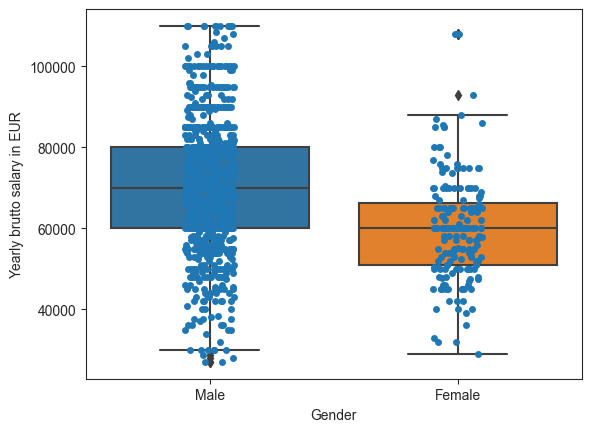

In [86]:
# Boxplot of salary by gender
sns.boxplot(df, x='Gender', y='Yearly brutto salary in EUR')

# Plot data points
sns.stripplot(df, x='Gender', y='Yearly brutto salary in EUR')

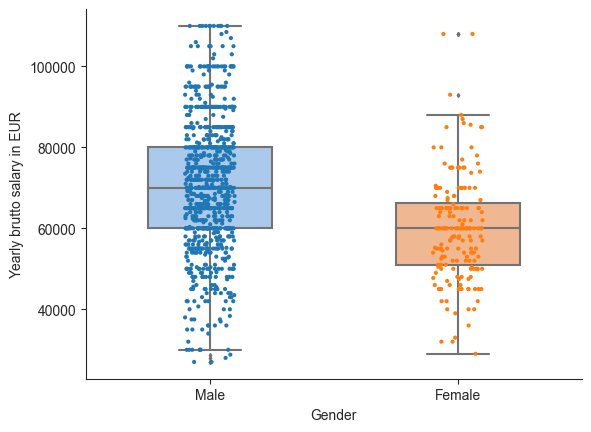

In [87]:
# Adjust colors and sizes
sns.boxplot(df, x='Gender', y='Yearly brutto salary in EUR',
            palette='pastel',
            width=0.5,
            fliersize=2)

sns.stripplot(df, x='Gender', y='Yearly brutto salary in EUR',
              size=3,
              hue='Gender',
              legend=False)

sns.despine()

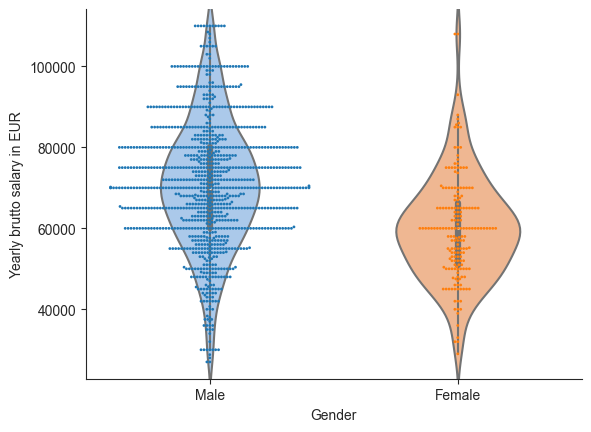

In [88]:
# Violinplot and swarmplot
sns.violinplot(df, x='Gender', y='Yearly brutto salary in EUR',
                palette='pastel',
                width=0.5)

sns.swarmplot(df, x='Gender', y='Yearly brutto salary in EUR',
              size=2,
              hue='Gender',
              legend=False)

sns.despine()

## 4) Bar plot

**How many data scientists are there?**

In [89]:
df = df.rename(columns={'Position ': 'Position'})

In [90]:
position_counts = df['Position'].value_counts()
position_counts

Software Engineer            356
Backend Developer            160
Data Scientist                99
Frontend Developer            84
QA Engineer                   68
                            ... 
Support Engineer               1
DBA                            1
DB developer/Data analyst      1
Stuttgart                      1
IT Operations Manager          1
Name: Position, Length: 133, dtype: int64

<BarContainer object of 133 artists>

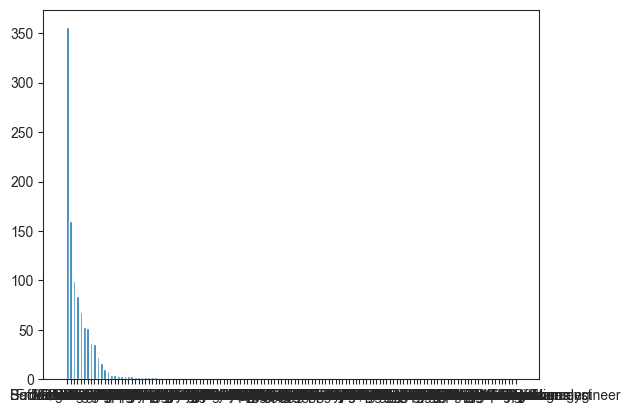

In [91]:
# Bar plot with count per Position
plt.bar(position_counts.index, position_counts.values)

In [92]:
# Only consider top 10 positions
position_counts = position_counts[:10]
position_counts

Software Engineer     356
Backend Developer     160
Data Scientist         99
Frontend Developer     84
QA Engineer            68
DevOps                 53
Mobile Developer       52
ML Engineer            37
Product Manager        36
Data Engineer          23
Name: Position, dtype: int64

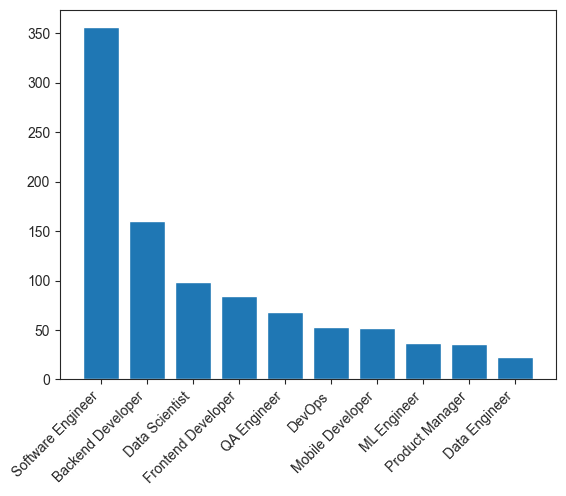

In [93]:
plt.bar(x=position_counts.index, height=position_counts.values)

# Rotate tick labels
plt.xticks(rotation=45, ha='right')
plt.show()

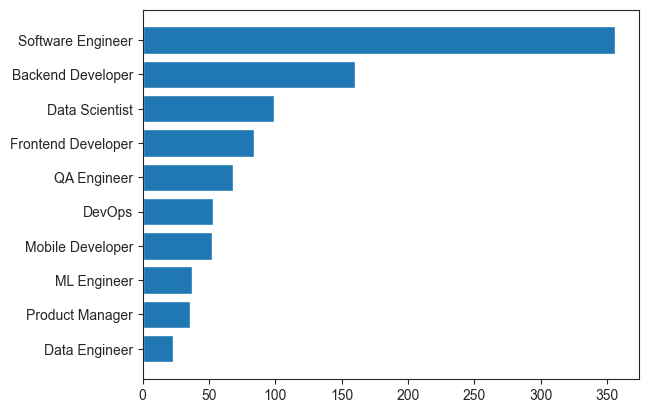

In [94]:
# Sort bars
position_counts = position_counts.sort_values()

# Horizontal bar plot (because of long labels)
plt.barh(y=position_counts.index, width=position_counts.values)

plt.show()

In [95]:
# Create custom colors with Data Scientists in blue
custom_colors = ['darkgray'] * 10
custom_colors[7] = 'tab:blue'

custom_colors

['darkgray',
 'darkgray',
 'darkgray',
 'darkgray',
 'darkgray',
 'darkgray',
 'darkgray',
 'tab:blue',
 'darkgray',
 'darkgray']

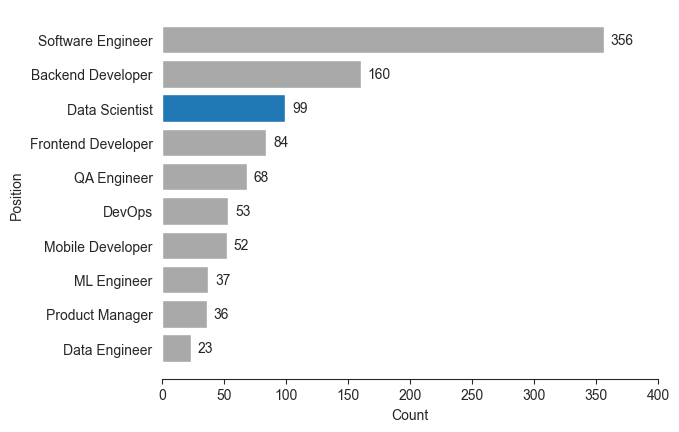

In [96]:
# Horizontal bar plot with custom colors
bars = plt.barh(y=position_counts.index, width=position_counts.values,
                color=custom_colors)

# Add axis labels
plt.xlabel('Count')
plt.ylabel('Position')

# Add count next to each bar
plt.bar_label(bars, padding=5)

# Remove chart border & y-axis (declutter!)
sns.despine(bottom=False, left=True)
plt.tick_params(left=False)
plt.xlim([0, 400])

plt.show()

## 5) Save plots for editing in Inkscape

Uncomment next line to install nutil package (see: https://github.com/anki-xyz/nutil)

In [97]:
#!pip install git+https://github.com/anki-xyz/nutil

In [98]:
from nutil.plot import paperStyle

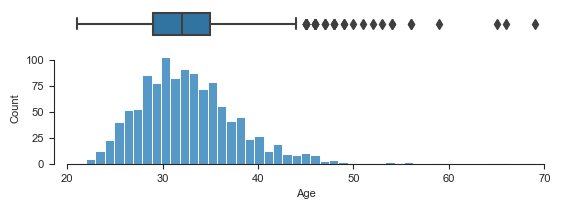

In [99]:
# Use "paperStyle" to define style for publication (scientific paper, thesis, ...)
with paperStyle(font_size=8):

    # Plot histogram & boxplot together using plt.subplots()
    fig, (ax_boxplot, ax_hist) = plt.subplots(nrows=2,
                                              figsize=(6.5, 2),
                                              gridspec_kw={"height_ratios": (.2, .8)})

    sns.boxplot(df, x='Age', ax=ax_boxplot)
    sns.histplot(df, x='Age', bins=49, ax=ax_hist)

    # Remove chart borders
    sns.despine(ax=ax_boxplot, left=True, bottom=True)
    sns.despine(ax=ax_hist, trim=True)
    ax_boxplot.set_xlabel('')
    ax_boxplot.set_yticks([])
    ax_boxplot.set_xticks([])
    
    plt.savefig('files/age.svg', bbox_inches='tight')

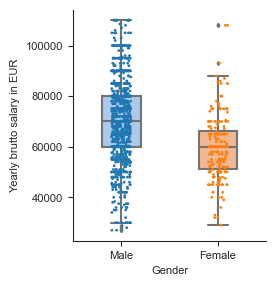

In [100]:
with paperStyle(font_size=8):
    plt.figure(figsize=(2.5, 3))
    sns.boxplot(df, x='Gender', y='Yearly brutto salary in EUR',
                palette='pastel', width=0.4, fliersize=2)
    sns.stripplot(df, x='Gender', y='Yearly brutto salary in EUR', size=2, hue='Gender', legend=False)
    sns.despine()
    
    plt.savefig('files/salary_by_gender.svg', bbox_inches='tight')

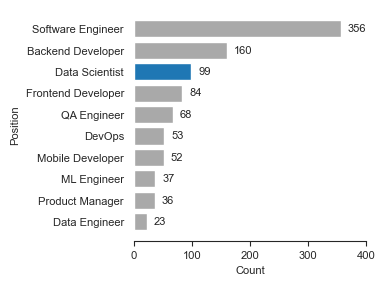

In [101]:
with paperStyle(font_size=8):
    plt.figure(figsize=(3,3))
    # Horizontal bar plot with custom colors
    bars = plt.barh(y=position_counts.index, width=position_counts.values,
                    color=custom_colors)

    # Add axis labels
    plt.xlabel('Count')
    plt.ylabel('Position')

    # Add count next to each bar
    plt.bar_label(bars, padding=5, fontsize=8)

    # Remove chart border & y-axis (declutter!)
    sns.despine(bottom=False, left=True)
    plt.tick_params(left=False)
    plt.xlim([0, 400])
    
    plt.savefig('files/positions.svg', bbox_inches='tight')